In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.decomposition import PCA
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

from data.skl_synthetic import *

In [34]:
home = Path.home()
path_for_data = home/"teas-data/sklearn/"
if not os.path.exists(path_for_data):
    make_skl_dataset()
if os.path.exists(path_for_data):
    X_train, X_valid, X_test, Y_train, Y_valid, Y_test = load_skl_data(path_for_data)

Visualise the data by plotting a random feature, and check compressibility

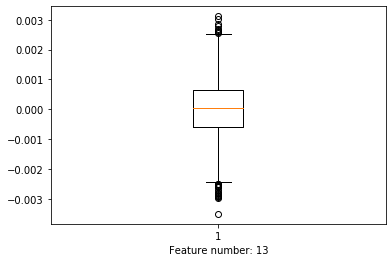

In [35]:
idx = np.random.randint(0, X_train.shape[1])
plt.boxplot(X_train[:,idx]);
plt.xlabel("Feature number: {}".format(idx));

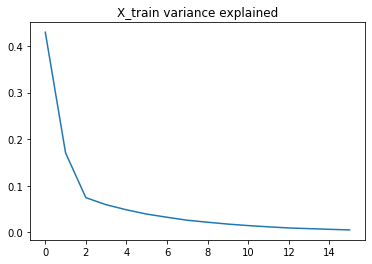

In [36]:
pca = PCA(n_components=16)
plt.plot( pca.fit(X_train).explained_variance_ratio_ )
plt.title("X_train variance explained");

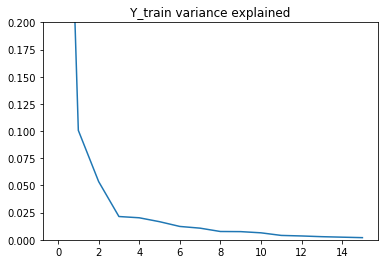

In [37]:
plt.plot( pca.fit(Y_train).explained_variance_ratio_ )
plt.title("Y_train variance explained");
plt.ylim(0, 0.2);

In [38]:
alphas = np.linspace(5e-5, 10e-4, num=10)
valid_losses = []
for alpha in alphas:
    print("Computing validation loss for alpha = {}".format(alpha))
    lasso_model = Lasso(alpha).fit(X_train, Y_train)
    Y_hat = lasso_model.predict(X_valid)
    valid_losses.append(mean_squared_error(Y_hat, Y_valid))

Computing validation loss for alpha = 5e-05
Computing validation loss for alpha = 0.00015555555555555556
Computing validation loss for alpha = 0.0002611111111111111
Computing validation loss for alpha = 0.00036666666666666667
Computing validation loss for alpha = 0.00047222222222222224
Computing validation loss for alpha = 0.0005777777777777778
Computing validation loss for alpha = 0.0006833333333333333
Computing validation loss for alpha = 0.0007888888888888889
Computing validation loss for alpha = 0.0008944444444444445
Computing validation loss for alpha = 0.001


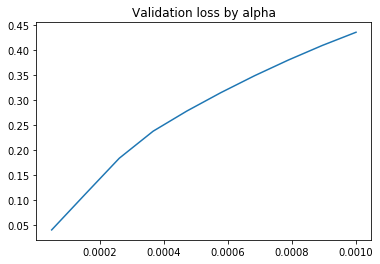

In [39]:
# plot losses
plt.plot(alphas, valid_losses)
plt.title("Validation loss by alpha")
plt.show()

In [40]:
lasso_model = Lasso(alphas[np.argmin(valid_losses)]).fit(X_train, Y_train)

Look at the model coefficients

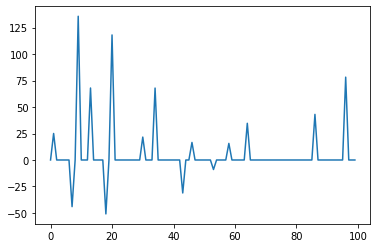

In [41]:
plt.plot(lasso_model.coef_[1])

In [42]:
Y_hat_valid = lasso_model.predict(X_valid)

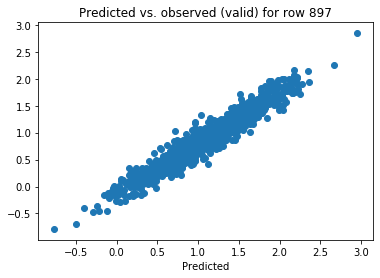

In [43]:
# plot predicted vs. observed for a random row
idx = np.random.randint(0, X_valid.shape[0])
plt.scatter(Y_valid[idx], Y_hat_valid[idx])
plt.xlabel("Observed")
plt.xlabel("Predicted")
plt.title("Predicted vs. observed (valid) for row {}".format(idx));

In [44]:
Y_hat_test = lasso_model.predict(X_test)

In [45]:
print("Final test loss (mse): {}".format(mean_squared_error(Y_hat_test, Y_test)))

Final test loss (mse): 0.039959880767811165
